## Coastal buffer - pixel dilation method (deprecated)

In [15]:
def createKernel(radius):
    kernel = np.zeros((2*radius+1, 2*radius+1))
    y,x = np.ogrid[-radius:radius+1, -radius:radius+1]
    mask = x**2 + y**2 <= radius**2
    kernel[mask] = 1
    return kernel

In [52]:
def idepix_coastal_buffer(polymer_ds, idepix_ds, radius=100):
    """
    With an IdePix image of 20m resolution, the default buffer distance is 100*20 = 2000m.
    """
    polymer_mask = np.isnan(polymer_ds['Rw665'].values)
    idepix_land_mask = (idepix_ds['pixel_classif_flags'].astype('int32') & 2**10) != 0

    # Create buffered land mask
    buffered_land = binary_dilation(idepix_land_mask, structure=createKernel(radius))

    # Coastal buffer = buffered land minus original land
    coastal_buffer = (buffered_land & ~idepix_land_mask) & ~polymer_mask

    coastal_buffer_da = xr.DataArray(
        coastal_buffer,
        coords=idepix_ds['pixel_classif_flags'].coords,
        dims=idepix_ds['pixel_classif_flags'].dims,
        name='coastal_buffer'
    )

    return coastal_buffer_da

Example

In [53]:
tileId = '30UUA'

In [54]:
idepix_fp = os.path.join(DATA_DIR, f's2_processed/{tileId}/idepix-{tileId}.nc')
idepix_ds = xr.open_dataset(idepix_fp)

In [55]:
polymer_fp = os.path.join(DATA_DIR, f's2_processed/{tileId}/polymer-{tileId}.nc')
polymer_ds = xr.open_dataset(polymer_fp)

In [56]:
coastal_buffer_da = idepix_coastal_buffer(polymer_ds, idepix_ds).astype(bool)

In [57]:
coastal_buffer_da

<xarray.DataArray 'coastal_buffer' (y: 3599, x: 5490)> Size: 20MB
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
    lat      (y, x) float64 158MB ...
    lon      (y, x) float64 158MB ...
Dimensions without coordinates: y, x

In [184]:
land_mask = (idepix_ds['pixel_classif_flags'].astype('int32') & 2**10) != 0

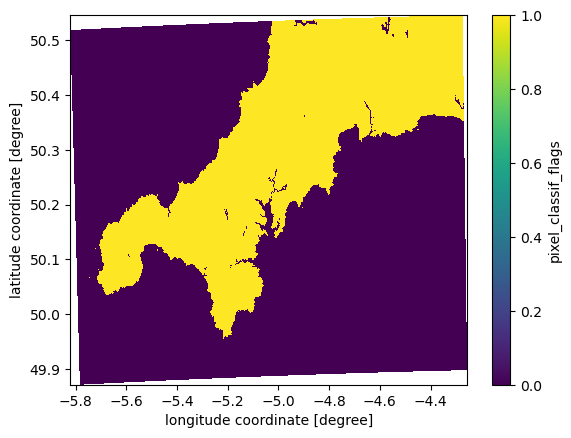

In [186]:
land_mask.plot(x='lon', y='lat')

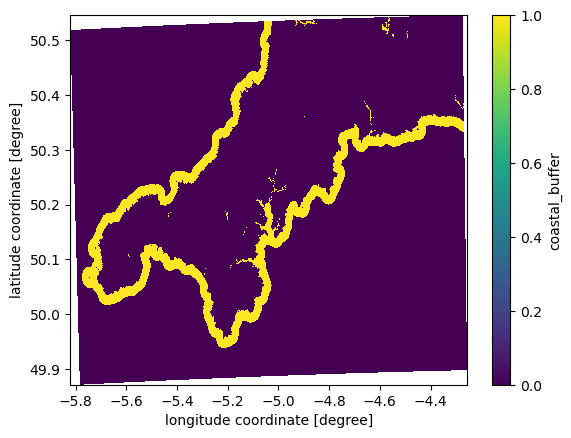

In [58]:
coastal_buffer_da.plot(x='lon', y='lat')

Save

In [ ]:
# coastal_buffer_da.to_file(...